In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\Dhanush Kumar R\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dhanush Kumar R\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Dhanush Kumar R\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
observations = 1000
xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_intro',inputs = generated_inputs,targets = generated_targets)

solving with tensrflow

In [36]:
training_data = np.load('TF_intro.npz')

input_size = 2
output_size = 1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer = tf.random_uniform_initializer(minval = -0.1,maxval = 0.1),
                         bias_initializer = tf.random_uniform_initializer(minval = -0.1,maxval = 0.1))
])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)
model.compile(optimizer= custom_optimizer,loss = 'mean_squared_error')
model.fit(training_data['inputs'],training_data['targets'],epochs = 100,verbose =2)

Epoch 1/100
32/32 - 0s - loss: 30.5923 - 165ms/epoch - 5ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1454 - 22ms/epoch - 688us/step
Epoch 3/100
32/32 - 0s - loss: 0.4416 - 23ms/epoch - 719us/step
Epoch 4/100
32/32 - 0s - loss: 0.3840 - 22ms/epoch - 687us/step
Epoch 5/100
32/32 - 0s - loss: 0.3818 - 22ms/epoch - 673us/step
Epoch 6/100
32/32 - 0s - loss: 0.4658 - 23ms/epoch - 719us/step
Epoch 7/100
32/32 - 0s - loss: 0.3869 - 26ms/epoch - 814us/step
Epoch 8/100
32/32 - 0s - loss: 0.3770 - 22ms/epoch - 703us/step
Epoch 9/100
32/32 - 0s - loss: 0.4330 - 23ms/epoch - 731us/step
Epoch 10/100
32/32 - 0s - loss: 0.3796 - 24ms/epoch - 740us/step
Epoch 11/100
32/32 - 0s - loss: 0.3769 - 24ms/epoch - 738us/step
Epoch 12/100
32/32 - 0s - loss: 0.4056 - 24ms/epoch - 753us/step
Epoch 13/100
32/32 - 0s - loss: 0.4323 - 23ms/epoch - 734us/step
Epoch 14/100
32/32 - 0s - loss: 0.3871 - 23ms/epoch - 719us/step
Epoch 15/100
32/32 - 0s - loss: 0.3847 - 23ms/epoch - 719us/step
Epoch 16/100
32/32 - 0s - loss: 0.

In [13]:
##Extracr the Weights and bias

In [14]:
model.layers[0].get_weights()

[array([[ 1.9632525],
        [-2.9786832]], dtype=float32),
 array([5.0093746], dtype=float32)]

In [15]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9632525],
       [-2.9786832]], dtype=float32)

In [16]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0093746], dtype=float32)

In [17]:
#extract output

In [24]:
model.predict_on_batch(training_data['inputs']).round(10)

array([[-1.97833729e+01],
       [ 1.44777231e+01],
       [ 2.41980782e+01],
       [ 1.01896648e+01],
       [ 3.93850479e+01],
       [-3.22742386e+01],
       [ 1.12551231e+01],
       [ 1.90227108e+01],
       [ 8.50616646e+00],
       [-3.10680771e+00],
       [ 1.71363487e+01],
       [ 1.05381193e+01],
       [-9.09012985e+00],
       [-3.28751087e+00],
       [ 2.09934731e+01],
       [-1.02252960e-02],
       [ 2.14024506e+01],
       [ 2.88869343e+01],
       [-3.45862503e+01],
       [ 4.59076080e+01],
       [ 1.81242263e+00],
       [-4.45503235e+00],
       [ 3.52179170e+00],
       [-1.14147415e+01],
       [ 8.82340622e+00],
       [ 2.29274139e+01],
       [ 6.46061897e+00],
       [-9.14029980e+00],
       [ 1.79248676e+01],
       [ 2.31530495e+01],
       [-3.19791317e+00],
       [ 9.89064693e+00],
       [ 2.20665073e+01],
       [-1.77581155e+00],
       [ 3.08561077e+01],
       [ 3.06818752e+01],
       [-1.62200031e+01],
       [-1.63238525e+00],
       [-2.0

In [26]:
training_data['targets'].round(1)

array([[-20.6],
       [ 14.1],
       [ 25.4],
       [  9.9],
       [ 40.1],
       [-31.8],
       [ 11.8],
       [ 19.6],
       [  7.8],
       [ -4. ],
       [ 16.6],
       [ 10.3],
       [ -9.2],
       [ -4. ],
       [ 21. ],
       [ -0.1],
       [ 20.6],
       [ 29.9],
       [-35.9],
       [ 47.2],
       [  1.4],
       [ -3.9],
       [  2.9],
       [-11.9],
       [  9.9],
       [ 23.2],
       [  7.2],
       [ -8.5],
       [ 18.5],
       [ 23.7],
       [ -4. ],
       [ 10. ],
       [ 22.8],
       [ -0.9],
       [ 31.6],
       [ 30.5],
       [-16.8],
       [ -2. ],
       [-20. ],
       [ 19. ],
       [  2.4],
       [ 50.6],
       [  0.1],
       [ -7.9],
       [ -2.6],
       [-22.7],
       [ -2.6],
       [ 22.1],
       [ 26. ],
       [-27.8],
       [-33. ],
       [ 26.2],
       [ 11.8],
       [ 37.9],
       [ 15.5],
       [-11.3],
       [-19.8],
       [ 10.9],
       [  3. ],
       [  5.3],
       [ 23.9],
       [-13.2],
       [

In [27]:
#plot the data

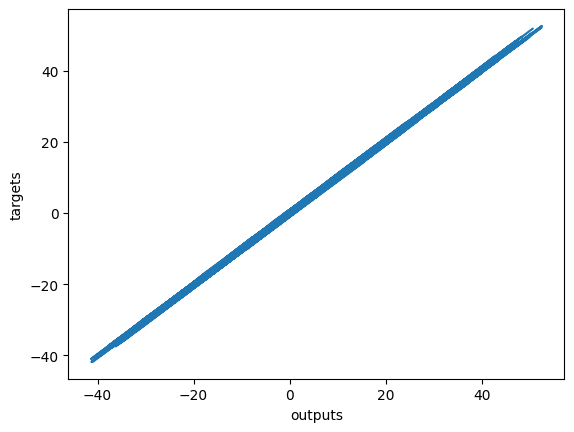

In [30]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()